Project by: Pranil Napit and Pranav Aryal

Dataset: NBA stats from 2012-2023 taken from https://www.basketball-reference.com/ 

# **1. Implementing PySpark and Loading Dataset**

In [ ]:
!hdfs dfs -ls /

Found 2 items
drwxr-xr-x   - hdoop supergroup          0 2023-05-11 14:50 /WordCountTutorial
drwx------   - hdoop supergroup          0 2023-03-29 09:29 /tmp


In [ ]:
!hdfs dfs -put /home/hdoop/Downloads/NBAallplayoffdata.csv /WordCountTutorial/NBAallplayoffdata.csv

In [ ]:
!hdfs dfs -put /home/hdoop/Downloads/NBAallregulardata.csv /WordCountTutorial/NBAallregulardata.csv

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 362.0 kB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 30.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317129 sha256=cbc881ec387514f1d1b1d43c6c9fa104c879fe354a5037e187631f2b1796b969
  Stored in directory: /home/hdoop/.cache/pip/wheels/db/1f/dc/108f626bfc37b270c82f400eb9cc6028ad9501cacad8dcce15
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col, sum

In [ ]:
spark = SparkSession.builder.appName('abc').getOrCreate()

23/05/11 15:01:24 WARN Utils: Your hostname, pranil-virtual-machine resolves to a loopback address: 127.0.1.1; using 192.168.160.128 instead (on interface ens33)
23/05/11 15:01:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/11 15:01:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
hdfs_path_regular = "hdfs://localhost:3857/WordCountTutorial/NBAallregulardata.csv"
hdfs_path_playoff = "hdfs://localhost:3857/WordCountTutorial/NBAallplayoffdata.csv"

df = spark.read.csv(hdfs_path_regular, header = True, inferSchema = True)
dfp = spark.read.csv(hdfs_path_playoff, header = True, inferSchema = True)

# **2. Importing Necessary Libraries**

In [ ]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **3. Cleaning the data**

In [ ]:
df.show(n=5)

+---+-------------+---+---+---+---+---+----+---+---+-----+---+---+----+---+---+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+----+-----------------+----+
| Rk|       Player|Pos|Age| Tm|  G| GS|  MP| FG|FGA|  FG%| 3P|3PA| 3P%| 2P|2PA|  2P%| eFG%| FT|FTA|  FT%|ORB|DRB|TRB|AST|STL|BLK|TOV| PF| PTS|Player-additional|Year|
+---+-------------+---+---+---+---+---+----+---+---+-----+---+---+----+---+---+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+----+-----------------+----+
|  1|   Quincy Acy| PF| 22|TOR| 29|  0| 342| 42| 75| 0.56|  1|  2| 0.5| 41| 73|0.562|0.567| 31| 38|0.816| 30| 47| 77| 11| 13| 15| 17| 53| 116|          acyqu01|2012|
|  2|  Jeff Adrien| PF| 26|CHA| 52|  5| 713| 72|168|0.429|  0|  2| 0.0| 72|166|0.434|0.429| 65|100| 0.65| 68|128|196| 36| 18| 27| 32| 80| 209|        adrieje01|2012|
|  3|Arron Afflalo| SF| 27|ORL| 64| 64|2307|397|905|0.439| 72|240| 0.3|325|665|0.489|0.478|191|223|0.857| 29|210|239|206| 40| 11|138|137|1057|        afflaar01|2012|
|  4

In [ ]:
dfp.show(n=5)

+---+---------------+---+---+---+---+---+---+---+---+-----+---+---+-----+---+---+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+---+-----------------+----+
| Rk|         Player|Pos|Age| Tm|  G| GS| MP| FG|FGA|  FG%| 3P|3PA|  3P%| 2P|2PA|  2P%| eFG%| FT|FTA|  FT%|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|Player-additional|Year|
+---+---------------+---+---+---+---+---+---+---+---+-----+---+---+-----+---+---+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+---+-----------------+----+
|  1|     Ray Allen*| SG| 37|MIA| 23|  0|573| 74|172| 0.43| 39| 96|0.406| 35| 76|0.461|0.544| 47| 54| 0.87| 13| 51| 64| 29| 12|  3| 27| 42|234|        allenra02|2012|
|  2|     Tony Allen| SG| 31|MEM| 15| 15|422| 54|125|0.432|  2|  8| 0.25| 52|117|0.444| 0.44| 44| 58|0.759| 37| 54| 91| 27| 30|  5| 19| 48|154|        allento01|2012|
|  3| Chris Andersen|  C| 34|MIA| 20|  0|303| 46| 57|0.807|  0|  0| null| 46| 57|0.807|0.807| 36| 49|0.735| 32| 44| 76|  3|  9| 22| 11| 53|128|        anderch01|2012

In [ ]:
df.count()

6548

In [ ]:
len(df.columns)

32

There are 6548 rows and 32 columns in the regular season data.

In [ ]:
dfp.count()

2146

In [ ]:
len(dfp.columns)

32

There are 2146 rows and 33 columns in the playoffs data.

In [ ]:
df.agg(*[count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+-----------------+----+
| Rk|Player|Pos|Age| Tm|  G| GS| MP| FG|FGA|FG%| 3P|3PA|3P%| 2P|2PA|2P%|eFG%| FT|FTA|FT%|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|Player-additional|Year|
+---+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+-----------------+----+
|  0|     0|  0|  0|  0|  0|  0|  0|  0|  0| 47|  0|  0|628|  0|  0|103|  47|  0|  0|387|  0|  0|  0|  0|  0|  0|  0|  0|  0|                0|   0|
+---+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+-----------------+----+



In [ ]:
dfp.agg(*[count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dfp.columns]).show()

+---+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+-----------------+----+
| Rk|Player|Pos|Age| Tm|  G| GS| MP| FG|FGA|FG%| 3P|3PA|3P%| 2P|2PA|2P%|eFG%| FT|FTA|FT%|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|Player-additional|Year|
+---+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+-----------------+----+
|  0|     0|  0|  0|  0|  0|  0|  0|  0|  0| 70|  0|  0|444|  0|  0|107|  70|  0|  0|393|  0|  0|  0|  0|  0|  0|  0|  0|  0|                0|   0|
+---+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+-----------------+----+



These null values are of players who never attempted a shot as we can see that only the percentage columns have null values which are generally the ratios of players making their shot to players attempting their shot. Since we will not be using those columns and create our own columns for these ratios, we will let them be for now.

Since we don't really need Rank column for the project, let us drop it before going any further.

In [ ]:
df = df.drop(col('Rk'))

In [ ]:
dfp = dfp.drop(col('Rk'))

In [ ]:
df.printSchema()

root
 |-- Player: string (nullable = true)
 |-- Pos: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tm: string (nullable = true)
 |-- G: integer (nullable = true)
 |-- GS: integer (nullable = true)
 |-- MP: integer (nullable = true)
 |-- FG: integer (nullable = true)
 |-- FGA: integer (nullable = true)
 |-- FG%: double (nullable = true)
 |-- 3P: integer (nullable = true)
 |-- 3PA: integer (nullable = true)
 |-- 3P%: double (nullable = true)
 |-- 2P: integer (nullable = true)
 |-- 2PA: integer (nullable = true)
 |-- 2P%: double (nullable = true)
 |-- eFG%: double (nullable = true)
 |-- FT: integer (nullable = true)
 |-- FTA: integer (nullable = true)
 |-- FT%: double (nullable = true)
 |-- ORB: integer (nullable = true)
 |-- DRB: integer (nullable = true)
 |-- TRB: integer (nullable = true)
 |-- AST: integer (nullable = true)
 |-- STL: integer (nullable = true)
 |-- BLK: integer (nullable = true)
 |-- TOV: integer (nullable = true)
 |-- PF: integer (nullable = true)
 

In [ ]:
dfp.printSchema()

root
 |-- Player: string (nullable = true)
 |-- Pos: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tm: string (nullable = true)
 |-- G: integer (nullable = true)
 |-- GS: integer (nullable = true)
 |-- MP: integer (nullable = true)
 |-- FG: integer (nullable = true)
 |-- FGA: integer (nullable = true)
 |-- FG%: double (nullable = true)
 |-- 3P: integer (nullable = true)
 |-- 3PA: integer (nullable = true)
 |-- 3P%: double (nullable = true)
 |-- 2P: integer (nullable = true)
 |-- 2PA: integer (nullable = true)
 |-- 2P%: double (nullable = true)
 |-- eFG%: double (nullable = true)
 |-- FT: integer (nullable = true)
 |-- FTA: integer (nullable = true)
 |-- FT%: double (nullable = true)
 |-- ORB: integer (nullable = true)
 |-- DRB: integer (nullable = true)
 |-- TRB: integer (nullable = true)
 |-- AST: integer (nullable = true)
 |-- STL: integer (nullable = true)
 |-- BLK: integer (nullable = true)
 |-- TOV: integer (nullable = true)
 |-- PF: integer (nullable = true)
 

Over the decade, there has been some changes for the teams in the NBA. So we will take a look at the names of the teams below.

In [ ]:
df.select(col("Tm")).dropDuplicates().show(df.count(), False)

+---+
|Tm |
+---+
|GSW|
|LAL|
|DET|
|TOT|
|NYK|
|CHO|
|LAC|
|UTA|
|NOH|
|BOS|
|TOR|
|SAS|
|POR|
|DEN|
|BRK|
|DAL|
|CLE|
|MIA|
|OKC|
|PHO|
|MIN|
|MEM|
|SAC|
|ATL|
|PHI|
|WAS|
|NOP|
|IND|
|CHA|
|HOU|
|CHI|
|ORL|
|MIL|
+---+



In [ ]:
df.select("Tm").distinct().count()

33

The teams CHA - Charlotte Bobcats and NOH - New Orleans Hornets no longer exist and they have been replaced by the teams CHO - Charlotte Hornets and NOP - New Orleans Pelicans. There should be 30 teams in the NBA, here we can see that these two old teams have taken a spot along with TOT category which specifies the total stats of a player who has been on more than one team that year.

In [ ]:
dfp.select(col("Tm")).dropDuplicates().show(dfp.count(), False)

+---+
|Tm |
+---+
|GSW|
|LAL|
|DET|
|NYK|
|CHO|
|LAC|
|UTA|
|BOS|
|TOR|
|SAS|
|POR|
|DEN|
|BRK|
|DAL|
|CLE|
|MIA|
|OKC|
|PHO|
|MIN|
|MEM|
|ATL|
|PHI|
|WAS|
|NOP|
|IND|
|HOU|
|CHA|
|CHI|
|ORL|
|MIL|
+---+



In [ ]:
dfp.select("Tm").distinct().count()

30

In [ ]:
df = df.withColumn("Tm", when(df.Tm.isin("NOP", "NOH"), "NO").otherwise(df.Tm))

In [ ]:
df = df.withColumn('Tm', when(df['Tm'].isin(['CHA', 'CHO']), 'CH').otherwise(df['Tm']))

In [ ]:
df.select("Tm").distinct().count()

31

Now we have replace the old teams with the name of the city because it is the same team but with different owners over the decade. The player stats are of the same team so it wouldn't matter if we categorized them into the same team.

We will be working with players and their stats for the specific team, so we will get rid of the data that have the total stats of the player who played for more than one team.

In [ ]:
df = df.filter(col("Tm") != "TOT")

In [ ]:
df.select("Tm").distinct().count()

30

In [ ]:
df.select(col("Tm")).dropDuplicates().show(df.count(), False)

+---+
|Tm |
+---+
|GSW|
|LAL|
|DET|
|NYK|
|LAC|
|UTA|
|BOS|
|TOR|
|SAS|
|POR|
|DEN|
|BRK|
|CH |
|DAL|
|CLE|
|MIA|
|OKC|
|PHO|
|MIN|
|MEM|
|SAC|
|ATL|
|PHI|
|WAS|
|NO |
|IND|
|HOU|
|CHI|
|ORL|
|MIL|
+---+



Now we have the teams columns sorted out.

In [ ]:
df.count()

5875

In [ ]:
len(df.columns)

31

In [ ]:
df.columns

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Player-additional',
 'Year']

In [ ]:
dfp.columns

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Player-additional',
 'Year']

In [ ]:
df = df.drop("Player-additional", "Age", "Pos", "GS", "eFG%")

In [ ]:
dfp = dfp.drop("Player-additional", "Age", "Pos", "GS", "eFG%")

In the dataset, there are columns that are total of, or percentage representation of other columns here. For example, if we divide FG by FGA, we will get the FG% column. And If we add ORB and DRB we will get the TRB column. So for future uses where these columns wont get mixed up, I will create a list of these columns that are not made by the sum of other columns.

In [ ]:
total_cols = ['MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# **4. Data Analysis**

Some sections were difficult to implement into Spark Dataframe, so I have converted the Spark Dataframe into Pandas Dataframe and done Data Analysis on them instead.

In [ ]:
df = df.toPandas()

In [ ]:
dfp = dfp.toPandas()

**4.1 Section 1**

Here we are analyzing which stats are correlated with each other. These correlations can give us in depth understanding of how players with different roles have different tendencies on the court.

First, we will take a look at stats of the players per minute. So to do that we will create a new dataframe and group them by Player and Year to because there might be players with same name as well.

In [ ]:
df_per_min = df.groupby(['Player', 'Year'])[total_cols].sum().reset_index()

In [ ]:
df_per_min

,Player,Year,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Hammons,2016,163,17,42,5,10,12,32,9,20,8,28,4,1,13,10,21,48
1,A.J. Price,2012,1278,161,413,70,200,91,213,49,62,20,94,205,33,3,64,73,441
2,A.J. Price,2013,99,19,46,6,22,13,24,0,2,1,9,13,1,0,7,5,44
3,A.J. Price,2014,324,51,137,15,57,36,80,16,24,6,26,46,7,0,14,15,133
4,Aaron Brooks,2012,997,143,316,50,134,93,182,40,52,13,67,114,30,10,67,94,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,Ömer A??k,2013,968,101,190,0,0,101,190,78,126,101,277,25,14,37,59,92,280
5143,Ömer A??k,2014,1982,213,412,0,0,213,412,131,225,244,504,72,29,54,95,144,557
5144,Ömer A??k,2015,1178,104,195,0,0,104,195,61,112,120,294,26,21,23,60,124,269
5145,Ömer A??k,2016,482,31,65,0,0,31,65,23,39,48,115,15,5,10,14,51,85


In [ ]:
for col in df_per_min.columns[3:]:
  df_per_min[col] = df_per_min[col]/df_per_min['MP'] #Looking at all stats per minute

#Shooting percentage
df_per_min['FG%'] = df_per_min['FG']/df_per_min['FGA']
df_per_min['3PT%'] = df_per_min['3P']/df_per_min['3PA'] 
df_per_min['FT%'] = df_per_min['FT']/df_per_min['FTA']

df_per_min['FG3A%'] = df_per_min['3PA']/df_per_min['FGA'] #3P attempt percentage
df_per_min['PTS/FGA'] = df_per_min['PTS']/df_per_min['FGA'] #Shooting efficiency/ pts per attempts
df_per_min['3P/FG'] = df_per_min['3P']/df_per_min['FG'] #Percent of field goals that are 3 points
df_per_min['FTA/FGA'] = df_per_min['FTA']/df_per_min['FGA'] #Rate of free throw
df_per_min['TRU%'] = 0.5 * df_per_min['PTS']/(df_per_min['FGA']+0.475*df_per_min['FTA']) #true field goal percentage/ formula taken from google
df_per_min['AST_TOV'] = df_per_min['AST']/df_per_min['TOV'] #turnover ratio

df_per_min

,Player,Year,MP,FG,FGA,3P,3PA,2P,2PA,FT,...,PTS,FG%,3PT%,FT%,FG3A%,PTS/FGA,3P/FG,FTA/FGA,TRU%,AST_TOV
0,A.J. Hammons,2016,163,0.104294,0.257669,0.030675,0.061350,0.073620,0.196319,0.055215,...,0.294479,0.404762,0.500000,0.450000,0.238095,1.142857,0.294118,0.476190,0.466019,0.400000
1,A.J. Price,2012,1278,0.125978,0.323161,0.054773,0.156495,0.071205,0.166667,0.038341,...,0.345070,0.389831,0.350000,0.790323,0.484262,1.067797,0.434783,0.150121,0.498361,3.203125
2,A.J. Price,2013,99,0.191919,0.464646,0.060606,0.222222,0.131313,0.242424,0.000000,...,0.444444,0.413043,0.272727,0.000000,0.478261,0.956522,0.315789,0.043478,0.468584,1.857143
3,A.J. Price,2014,324,0.157407,0.422840,0.046296,0.175926,0.111111,0.246914,0.049383,...,0.410494,0.372263,0.263158,0.666667,0.416058,0.970803,0.294118,0.175182,0.448113,3.285714
4,Aaron Brooks,2012,997,0.143430,0.316951,0.050150,0.134403,0.093280,0.182548,0.040120,...,0.377131,0.452532,0.373134,0.769231,0.424051,1.189873,0.349650,0.164557,0.551805,1.701493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,Ömer A??k,2013,968,0.104339,0.196281,0.000000,0.000000,0.104339,0.196281,0.080579,...,0.289256,0.531579,NaN,0.619048,0.000000,1.473684,0.000000,0.663158,0.560336,0.423729
5143,Ömer A??k,2014,1982,0.107467,0.207871,0.000000,0.000000,0.107467,0.207871,0.066095,...,0.281029,0.516990,NaN,0.582222,0.000000,1.351942,0.000000,0.546117,0.536738,0.757895
5144,Ömer A??k,2015,1178,0.088285,0.165535,0.000000,0.000000,0.088285,0.165535,0.051783,...,0.228353,0.533333,NaN,0.544643,0.000000,1.379487,0.000000,0.574359,0.541902,0.433333
5145,Ömer A??k,2016,482,0.064315,0.134855,0.000000,0.000000,0.064315,0.134855,0.047718,...,0.176349,0.476923,NaN,0.589744,0.000000,1.307692,0.000000,0.600000,0.508830,1.071429


Now we will filter out the player who have not played at least 50 minutes so that the ratios are more accurate and relevant.

In [ ]:
(df_per_min['MP']>=50).mean()

0.9201476588303866

This means that 92% of the players have played at least 50 mins in the NBA.

In [ ]:
df_per_min = df_per_min[df_per_min['MP']>=50]

In [ ]:
df_per_min

,Player,Year,MP,FG,FGA,3P,3PA,2P,2PA,FT,...,PTS,FG%,3PT%,FT%,FG3A%,PTS/FGA,3P/FG,FTA/FGA,TRU%,AST_TOV
0,A.J. Hammons,2016,163,0.104294,0.257669,0.030675,0.061350,0.073620,0.196319,0.055215,...,0.294479,0.404762,0.500000,0.450000,0.238095,1.142857,0.294118,0.476190,0.466019,0.400000
1,A.J. Price,2012,1278,0.125978,0.323161,0.054773,0.156495,0.071205,0.166667,0.038341,...,0.345070,0.389831,0.350000,0.790323,0.484262,1.067797,0.434783,0.150121,0.498361,3.203125
2,A.J. Price,2013,99,0.191919,0.464646,0.060606,0.222222,0.131313,0.242424,0.000000,...,0.444444,0.413043,0.272727,0.000000,0.478261,0.956522,0.315789,0.043478,0.468584,1.857143
3,A.J. Price,2014,324,0.157407,0.422840,0.046296,0.175926,0.111111,0.246914,0.049383,...,0.410494,0.372263,0.263158,0.666667,0.416058,0.970803,0.294118,0.175182,0.448113,3.285714
4,Aaron Brooks,2012,997,0.143430,0.316951,0.050150,0.134403,0.093280,0.182548,0.040120,...,0.377131,0.452532,0.373134,0.769231,0.424051,1.189873,0.349650,0.164557,0.551805,1.701493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,Ömer A??k,2013,968,0.104339,0.196281,0.000000,0.000000,0.104339,0.196281,0.080579,...,0.289256,0.531579,NaN,0.619048,0.000000,1.473684,0.000000,0.663158,0.560336,0.423729
5143,Ömer A??k,2014,1982,0.107467,0.207871,0.000000,0.000000,0.107467,0.207871,0.066095,...,0.281029,0.516990,NaN,0.582222,0.000000,1.351942,0.000000,0.546117,0.536738,0.757895
5144,Ömer A??k,2015,1178,0.088285,0.165535,0.000000,0.000000,0.088285,0.165535,0.051783,...,0.228353,0.533333,NaN,0.544643,0.000000,1.379487,0.000000,0.574359,0.541902,0.433333
5145,Ömer A??k,2016,482,0.064315,0.134855,0.000000,0.000000,0.064315,0.134855,0.047718,...,0.176349,0.476923,NaN,0.589744,0.000000,1.307692,0.000000,0.600000,0.508830,1.071429


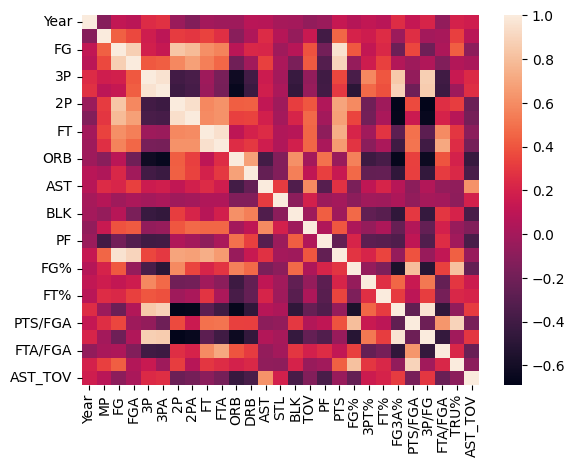

In [ ]:
sns.heatmap(df_per_min.corr())
plt.show()

In [ ]:
fig = px.imshow(df_per_min.corr())
fig.show()

The above heatmap gives a lot of insights to what the players tend to do. For example, if we look at the correlation between PF - Personal Foul and ORB or DRB - which is Offensive rebound and defensive rebound, we can see that they are positively correlated which means that the players that are committing the foul are players that are most likely players who are guarding the basket and attempting to stop the players from easy points. We can also see that ORB or DRB is negatively correlated with FGA,3P and 3PA (Field goal attempts, 3 points made and 3 point attempted) which goes to show that the players that are usually inside the court trying to grab rebounds are not likely to shoot 3 point shots which are outside shots. This heatmap shows direct connections and stats of players who have specific roles on the team. Above example can be said about players playing in Power Forward or Center position who are mostly the defensive anchors of the team focused on rebounds and defense.

**4.2 Section 2**

In this section, we will analyze how the playing time is distributed among the players i.e. rotations. We will also analyze and compare the stats during regular season and playoffs.

Regular Season

In [ ]:
fig = px.histogram(x=df['MP'])
fig.show()

The above histogram shows that 938 players have played under 100 minutes and 179 players have played for 1400-1499 minutes and only 4 players have played for 3100-3199 minutes in the NBA regular season.

We can see that it is skewed to the right. And this shows that most NBA players do not get much play time at all either due to rotations or injuries.

In [ ]:
fig = px.histogram(x=df['MP'], histnorm='percent')
fig.show()

The above histogram is a percentile representation of the players and their minutes. We can see that about 16% of the NBA players play less than 100 minutes and only 0.068% have played 3100-3199 minutes.

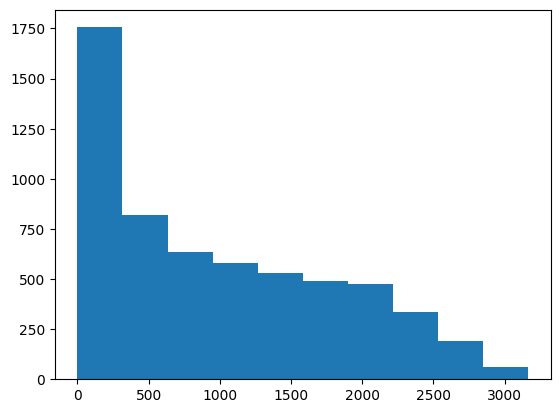

In [ ]:
plt.hist(df['MP'])
plt.show()

Same as above, just in matplotlib.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['MP']/df['G'], histnorm = 'percent', name = "Regular Season"))
fig.show()

The above histogram shows that there is normal distribution for minutes played per game. These stats are only for regular season of the NBA, which means that over the span of 82 games, almost all the players get a chance to play on the team and depending on their performance their minutes either increase or decrease.

Playoffs

In [ ]:
fig = px.histogram(x=dfp['MP'], histnorm='percent')
fig.show()

The minutes played for the players in the playoffs seem to be similar to the regular season. Very high percent of players get very less play time while very few players get higher percent of playing time. Lets take a deeper look at the stats.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=dfp['MP']/dfp['G'], histnorm = 'percent', name="Playoffs"))
fig.show()

In the above histogram, we can see that there is right skewed distribution. There are higher percentage of players getting less playtime. But we can also see that there is somewhat consistency in terms of players getting playtime overall. To better understand, we will see the regular season graph and playoff season graph at once.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['MP']/df['G'], histnorm = 'percent', name="Regular Season", xbins={'start':0, 'end': 46, 'size': 1}))
fig.add_trace(go.Histogram(x=dfp['MP']/dfp['G'], histnorm = 'percent', name="Playoffs", xbins={'start':0, 'end': 46, 'size': 1}))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.show()

In the above histogram, we can clearly see that in regular season all the players tend to get playing time. But in Playoffs, a lot of these players dont get much playing time or no play time whereas a consistent number of players get a lot of playing time as well. It means that in playoffs, the star players and starters and few key role players of the team tend to get more playing time as compared to just a normal player on the team. We can see that, that is not the case in terms for the regular season where almost all the players get playing time in a consistent amount.

Now we will analyze the players in the regular season and playoffs based on their points scored.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['PTS']/df['G'], histnorm = 'percent', name="Regular Season", xbins={'start':0, 'end': 38, 'size': 1}))
fig.add_trace(go.Histogram(x=dfp['PTS']/dfp['G'], histnorm = 'percent', name="Playoffs", xbins={'start':0, 'end': 38, 'size': 1}))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.show()

From above histogram, we can see that in the playoffs, majority of the players dont score as much. In regular season the number of points scored is slightly higher by these players. We can also in the tail, the players score more points per game during playoffs, which means that the star players and starters of the team tend to score more points as playoff games are much more important than a regular season game. This goes to show that star players are very much important to the team during the playoffs as their numbers seem to increase during the playoffs when it matters the most.

**4.3 Section 3**

In this section, we will analyze the change in the game over the past 10 years.

In [ ]:
ch_df = df.groupby('Year')[total_cols].sum().reset_index()

Here we have grouped the stats in terms of the year and added all the stats for that year to display the total stats of that particular year.

In [ ]:
ch_df

,Year,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,2012,594486,91282,201609,17603,49067,73679,152542,41056,54533,27456,76119,54415,19178,12622,34294,48775,241223
1,2013,595193,92779,204172,19054,52974,73725,151198,43870,58029,26846,78315,54131,18895,11594,34566,50923,248482
2,2014,595203,92287,205570,19300,55137,72987,150433,42161,56198,26781,79723,54202,19031,11797,33725,49728,246035
3,2015,594863,94065,208049,20953,59242,73112,148807,43489,57469,25624,82021,54833,19303,12193,33936,49854,252572
4,2016,594404,96061,210115,23748,66422,72313,143693,43883,56855,24937,82109,55660,18950,11669,32897,48950,259753
5,2017,593860,97435,211709,25807,71340,71628,140369,40903,53325,23891,83161,57163,18983,11846,33642,48837,261580
6,2018,594458,101062,219458,27955,78742,73107,140716,43494,56758,25454,85653,60483,18779,12185,33293,51425,273573
7,2019,512054,86550,188116,25862,72252,60688,115864,37826,48943,21340,73617,51649,16200,10378,29470,44004,236788
8,2020,521498,89020,190983,27427,74822,61593,116161,36650,47135,21232,74454,53577,16356,10525,28568,41669,242117
9,2021,593747,99930,216722,30598,86535,69332,130187,41657,53781,25422,83925,60636,18772,11594,32117,48306,272115


The total minutes played in season 2019 and 2020 is less than other years due to the pandemic. Games were cancelled and the season was shorter during this time.

To get more deeper look, it is best to look into the stats per 48 minutes. 48 minutes is the total time of a basketball game. But over the course of 10 years, the pace of the game may have gone up and down. So it won't be an accurate estimate of how the game has changed.

So to get the true estimate, using possession of the ball might be the solution. In basketball, ball possession means that you have the ball. More possession means that the pace of the game has increased and teams score more points which in turn means that teams have more possession.

Possession stat is not available in the stats, so we will be generating an estimate of it based on logic of a basketball game. A possession in basketball can only end with either Scoring the basket or Missing the shot and the opponent gets the rebound or Turnovers or you get fouled and get a free throw. Based on this information, we can generate a formula that is an estimate of possession in that year. (The formula is googled.)

In [ ]:
ch_df['POSS_est'] = ch_df['FGA']-ch_df['ORB']+ch_df['TOV']+0.44*ch_df['FTA'] #googled formula

In [ ]:
ch_df

,Year,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,POSS_est
0,2012,594486,91282,201609,17603,49067,73679,152542,41056,54533,27456,76119,54415,19178,12622,34294,48775,241223,232441.52
1,2013,595193,92779,204172,19054,52974,73725,151198,43870,58029,26846,78315,54131,18895,11594,34566,50923,248482,237424.76
2,2014,595203,92287,205570,19300,55137,72987,150433,42161,56198,26781,79723,54202,19031,11797,33725,49728,246035,237241.12
3,2015,594863,94065,208049,20953,59242,73112,148807,43489,57469,25624,82021,54833,19303,12193,33936,49854,252572,241647.36
4,2016,594404,96061,210115,23748,66422,72313,143693,43883,56855,24937,82109,55660,18950,11669,32897,48950,259753,243091.20
5,2017,593860,97435,211709,25807,71340,71628,140369,40903,53325,23891,83161,57163,18983,11846,33642,48837,261580,244923.00
6,2018,594458,101062,219458,27955,78742,73107,140716,43494,56758,25454,85653,60483,18779,12185,33293,51425,273573,252270.52
7,2019,512054,86550,188116,25862,72252,60688,115864,37826,48943,21340,73617,51649,16200,10378,29470,44004,236788,217780.92
8,2020,521498,89020,190983,27427,74822,61593,116161,36650,47135,21232,74454,53577,16356,10525,28568,41669,242117,219058.40
9,2021,593747,99930,216722,30598,86535,69332,130187,41657,53781,25422,83925,60636,18772,11594,32117,48306,272115,247080.64


We will be using Possession estimate column later, so for convenience let us move the column to the front.

In [ ]:
ch_df = ch_df[list(ch_df.columns[0:2])+['POSS_est']+list(ch_df.columns[2:-1])]

In [ ]:
ch_df

,Year,MP,POSS_est,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,2012,594486,232441.52,91282,201609,17603,49067,73679,152542,41056,54533,27456,76119,54415,19178,12622,34294,48775,241223
1,2013,595193,237424.76,92779,204172,19054,52974,73725,151198,43870,58029,26846,78315,54131,18895,11594,34566,50923,248482
2,2014,595203,237241.12,92287,205570,19300,55137,72987,150433,42161,56198,26781,79723,54202,19031,11797,33725,49728,246035
3,2015,594863,241647.36,94065,208049,20953,59242,73112,148807,43489,57469,25624,82021,54833,19303,12193,33936,49854,252572
4,2016,594404,243091.20,96061,210115,23748,66422,72313,143693,43883,56855,24937,82109,55660,18950,11669,32897,48950,259753
5,2017,593860,244923.00,97435,211709,25807,71340,71628,140369,40903,53325,23891,83161,57163,18983,11846,33642,48837,261580
6,2018,594458,252270.52,101062,219458,27955,78742,73107,140716,43494,56758,25454,85653,60483,18779,12185,33293,51425,273573
7,2019,512054,217780.92,86550,188116,25862,72252,60688,115864,37826,48943,21340,73617,51649,16200,10378,29470,44004,236788
8,2020,521498,219058.40,89020,190983,27427,74822,61593,116161,36650,47135,21232,74454,53577,16356,10525,28568,41669,242117
9,2021,593747,247080.64,99930,216722,30598,86535,69332,130187,41657,53781,25422,83925,60636,18772,11594,32117,48306,272115


In [ ]:
ch_df['FG%'] = ch_df['FG']/ch_df['FGA']
ch_df['3PT%'] = ch_df['3P']/ch_df['3PA']
ch_df['2P%'] = ch_df['2P']/ch_df['2PA']
ch_df['FT%'] = ch_df['FT']/ch_df['FTA']
ch_df['AST%'] = ch_df['AST']/ch_df['FG']
ch_df['FG3A%'] = ch_df['3PA']/ch_df['FGA']
ch_df['FG2A%'] = ch_df['2PA']/ch_df['FGA']
ch_df['PTS/FGA'] = ch_df['PTS']/ch_df['FGA']
ch_df['FG3M/FGM'] = ch_df['3P']/ch_df['FG']
ch_df['FTA/FGA'] = ch_df['FTA']/ch_df['FGA']
ch_df['TRU%'] = 0.5*ch_df['PTS']/(ch_df['FGA']+0.475*ch_df['FTA']) #formula from google
ch_df['AST_TOV'] = ch_df['AST']/ch_df['TOV']

In [ ]:
ch_df

,Year,MP,POSS_est,FG,FGA,3P,3PA,2P,2PA,FT,...,2P%,FT%,AST%,FG3A%,FG2A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,594486,232441.52,91282,201609,17603,49067,73679,152542,41056,...,0.483008,0.752865,0.596120,0.243377,0.756623,1.196489,0.192842,0.270489,0.530132,1.586721
1,2013,595193,237424.76,92779,204172,19054,52974,73725,151198,43870,...,0.487606,0.756001,0.583440,0.259458,0.740542,1.217023,0.205370,0.284216,0.536132,1.566019
2,2014,595203,237241.12,92287,205570,19300,55137,72987,150433,42161,...,0.485179,0.750222,0.587320,0.268215,0.731785,1.196843,0.209130,0.273376,0.529645,1.607176
3,2015,594863,241647.36,94065,208049,20953,59242,73112,148807,43489,...,0.491321,0.756738,0.582927,0.284750,0.715250,1.214002,0.222750,0.276228,0.536595,1.615777
4,2016,594404,243091.20,96061,210115,23748,66422,72313,143693,43883,...,0.503247,0.771841,0.579423,0.316122,0.683878,1.236242,0.247218,0.270590,0.547722,1.691948
5,2017,593860,244923.00,97435,211709,25807,71340,71628,140369,40903,...,0.510284,0.767051,0.586678,0.336972,0.663028,1.235564,0.264864,0.251879,0.551767,1.699156
6,2018,594458,252270.52,101062,219458,27955,78742,73107,140716,43494,...,0.519536,0.766306,0.598474,0.358802,0.641198,1.246585,0.276612,0.258628,0.555099,1.816688
7,2019,512054,217780.92,86550,188116,25862,72252,60688,115864,37826,...,0.523787,0.772858,0.596753,0.384082,0.615918,1.258734,0.298810,0.260175,0.560143,1.752596
8,2020,521498,219058.40,89020,190983,27427,74822,61593,116161,36650,...,0.530238,0.777554,0.601854,0.391773,0.608227,1.267741,0.308099,0.246802,0.567359,1.875420
9,2021,593747,247080.64,99930,216722,30598,86535,69332,130187,41657,...,0.532557,0.774567,0.606785,0.399290,0.600710,1.255595,0.306194,0.248157,0.561599,1.887972


Average stats per 48 minutes per team in the season

In [ ]:
ch_per48_df = ch_df.copy()

In [ ]:
ch_per48_df.columns

Index(['Year', 'MP', 'POSS_est', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT',
       'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%',
       '3PT%', '2P%', 'FT%', 'AST%', 'FG3A%', 'FG2A%', 'PTS/FGA', 'FG3M/FGM',
       'FTA/FGA', 'TRU%', 'AST_TOV'],
      dtype='object')

In [ ]:
ch_per48_df.columns[2:19]

Index(['POSS_est', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB',
       'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [ ]:
ch_per48_df.dtypes

Year          int64
MP            int32
POSS_est    float64
FG            int32
FGA           int32
3P            int32
3PA           int32
2P            int32
2PA           int32
FT            int32
FTA           int32
ORB           int32
DRB           int32
AST           int32
STL           int32
BLK           int32
TOV           int32
PF            int32
PTS           int32
FG%         float64
3PT%        float64
2P%         float64
FT%         float64
AST%        float64
FG3A%       float64
FG2A%       float64
PTS/FGA     float64
FG3M/FGM    float64
FTA/FGA     float64
TRU%        float64
AST_TOV     float64
dtype: object

In [ ]:
for col in ch_per48_df.columns[2:19]:
  ch_per48_df[col] = (ch_per48_df[col]/ch_per48_df['MP'])*48*5

The above used formula is a for loop to calculate the average stats per 48 minutes per team. For that, each column that are not a ratio that we had defined earlier, will be divided by total minutes which gives us average per minute. So we multiply that with 48 to convert it into per 48 minutes stat along with 5 because there are 5 total players per team on the court in a possession.

In [ ]:
ch_per48_df.drop(columns = 'MP', inplace = True)

In [ ]:
ch_per48_df

,Year,POSS_est,FG,FGA,3P,3PA,2P,2PA,FT,FTA,...,2P%,FT%,AST%,FG3A%,FG2A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,93.838988,36.851465,81.391589,7.106509,19.808843,29.744956,61.582745,16.574722,22.015523,...,0.483008,0.752865,0.596120,0.243377,0.756623,1.196489,0.192842,0.270489,0.530132,1.586721
1,2013,95.736916,37.411327,82.328388,7.683155,21.360735,29.728172,60.967653,17.689724,23.399066,...,0.487606,0.756001,0.583440,0.259458,0.740542,1.217023,0.205370,0.284216,0.536132,1.566019
2,2014,95.661260,37.212312,82.890711,7.782219,22.232549,29.430094,60.658162,17.000318,22.660370,...,0.485179,0.750222,0.587320,0.268215,0.731785,1.196843,0.209130,0.273376,0.529645,1.607176
3,2015,97.493652,37.950923,83.938251,8.453577,23.901436,29.497346,60.036815,17.545821,23.186112,...,0.491321,0.756738,0.582927,0.284750,0.715250,1.214002,0.222750,0.276228,0.536595,1.615777
4,2016,98.151910,38.786145,84.837249,9.588630,26.818931,29.197515,58.018318,17.718454,22.956104,...,0.503247,0.771841,0.579423,0.316122,0.683878,1.236242,0.247218,0.270590,0.547722,1.691948
5,2017,98.982117,39.376958,85.559155,10.429529,28.831038,28.947429,56.728118,16.530361,21.550534,...,0.510284,0.767051,0.586678,0.336972,0.663028,1.235564,0.264864,0.251879,0.551767,1.699156
6,2018,101.848953,40.801671,88.601583,11.286247,31.790438,29.515424,56.811146,17.559794,22.914857,...,0.519536,0.766306,0.598474,0.358802,0.641198,1.246585,0.276612,0.258628,0.555099,1.816688
7,2019,102.074041,40.566034,88.170076,12.121534,33.864553,28.444500,54.305522,17.729068,22.939612,...,0.523787,0.772858,0.596753,0.384082,0.615918,1.258734,0.298810,0.260175,0.560143,1.752596
8,2020,100.813457,40.968134,87.892801,12.622254,34.434034,28.345881,53.458767,16.866795,21.692125,...,0.530238,0.777554,0.601854,0.391773,0.608227,1.267741,0.308099,0.246802,0.567359,1.875420
9,2021,99.873100,40.392962,87.601756,12.368096,34.978535,28.024866,52.623222,16.838283,21.738956,...,0.532557,0.774567,0.606785,0.399290,0.600710,1.255595,0.306194,0.248157,0.561599,1.887972


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ch_per48_df['Year'], y=ch_per48_df['POSS_est'], name='Possession estimate'))
fig.show()

In the above plot, we can see that the possession estimate has steadily increased over the course of the decade. This means that the pace of the game has increased.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ch_per48_df['Year'], y=ch_per48_df['FG'], name='Field Goals Made'))
fig.show()

From the above plot, we can see that the number of field goals made has also increased over the decade. This is due to the increase in pace of the game as we saw in the above graph of possession estimate and it also indicates that the teams might be prioritizing scoring over defending as well.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ch_per48_df['Year'], y=ch_per48_df['PTS'], name='Points Scored'))
fig.show()

We can see in the above plot, that the points scored by a team per 48 minutes has increased as well. This definitely shows that the pace of the game has increased. There is a slight decend at the tail of the plot, which might be because maybe the teams have figured out how to counter the offense better than the previous years. This hypothesis can only be confirmed after we get the stats from the coming years.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ch_per48_df['Year'], y=ch_per48_df['2PA'], name='2 point attempts'))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ch_per48_df['Year'], y=ch_per48_df['3PA'], name='3 point attempts'))
fig.show()

From the above two plots, we can see that the number of 2 point shot attempts has dropped down while the number of 3 point shot has increased significantly. This clearly indicates that the game has not only changed in terms of the pace but also evolved so that new players are expected to be able to take 3 point shots regardless of their roles in the court as opposed to what it used to be in the past. This goes to show that the teams have stopped taking inefficient mid range shots and started focusing on taking 3 point shots instead.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ch_per48_df['Year'], y=ch_per48_df['TRU%'], name='True shooting percent'))
fig.show()

We can also see that the offensive efficiency of the teams on the league has significantly improved over the course of the decade. This goes to show that taking 3 point shots more often than the mid range shots like the teams used to is much more efficient offensively for the teams and the result can be seen above.

Even from just these average numbers of stats per 48 minutes per team, we can see that there are significant changes in the game. First the most noticable change is that the number of 3 point attempts per team has risen significantly. And the number of 2 point shot attempts has decreased slightly as well. We can also see that the pace of the game has definitely risen as we can see that the points scored, Field goals made and attempted has risen as well along with the Possession estimate. These graphs also indicate that these changes were beneficial for the teams in terms of offense as their offensive efficiency is at an all time high because of these said changes.

Average stats of the team per 100 possessions

In [ ]:
ch_per100_df = ch_df.copy()

In [ ]:
ch_per100_df

,Year,MP,POSS_est,FG,FGA,3P,3PA,2P,2PA,FT,...,2P%,FT%,AST%,FG3A%,FG2A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,594486,232441.52,91282,201609,17603,49067,73679,152542,41056,...,0.483008,0.752865,0.596120,0.243377,0.756623,1.196489,0.192842,0.270489,0.530132,1.586721
1,2013,595193,237424.76,92779,204172,19054,52974,73725,151198,43870,...,0.487606,0.756001,0.583440,0.259458,0.740542,1.217023,0.205370,0.284216,0.536132,1.566019
2,2014,595203,237241.12,92287,205570,19300,55137,72987,150433,42161,...,0.485179,0.750222,0.587320,0.268215,0.731785,1.196843,0.209130,0.273376,0.529645,1.607176
3,2015,594863,241647.36,94065,208049,20953,59242,73112,148807,43489,...,0.491321,0.756738,0.582927,0.284750,0.715250,1.214002,0.222750,0.276228,0.536595,1.615777
4,2016,594404,243091.20,96061,210115,23748,66422,72313,143693,43883,...,0.503247,0.771841,0.579423,0.316122,0.683878,1.236242,0.247218,0.270590,0.547722,1.691948
5,2017,593860,244923.00,97435,211709,25807,71340,71628,140369,40903,...,0.510284,0.767051,0.586678,0.336972,0.663028,1.235564,0.264864,0.251879,0.551767,1.699156
6,2018,594458,252270.52,101062,219458,27955,78742,73107,140716,43494,...,0.519536,0.766306,0.598474,0.358802,0.641198,1.246585,0.276612,0.258628,0.555099,1.816688
7,2019,512054,217780.92,86550,188116,25862,72252,60688,115864,37826,...,0.523787,0.772858,0.596753,0.384082,0.615918,1.258734,0.298810,0.260175,0.560143,1.752596
8,2020,521498,219058.40,89020,190983,27427,74822,61593,116161,36650,...,0.530238,0.777554,0.601854,0.391773,0.608227,1.267741,0.308099,0.246802,0.567359,1.875420
9,2021,593747,247080.64,99930,216722,30598,86535,69332,130187,41657,...,0.532557,0.774567,0.606785,0.399290,0.600710,1.255595,0.306194,0.248157,0.561599,1.887972


In [ ]:
ch_per100_df.columns[3:19]

Index(['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [ ]:
for col in ch_per100_df.columns[3:19]:
  ch_per100_df[col] = (ch_per100_df[col]/ch_per100_df['POSS_est'])*100

The above used formula is a for loop to calculate the average stats per 100 possession. For that, each column that are not a ratio that we had defined earlier, will be divided by the possession estimate, which gives us the stat for a single possession, then we will multiply that with 100 to make it 100 possessions.

In [ ]:
ch_per100_df

,Year,MP,POSS_est,FG,FGA,3P,3PA,2P,2PA,FT,...,2P%,FT%,AST%,FG3A%,FG2A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,594486,232441.52,39.270953,86.735365,7.573088,21.109396,31.697865,65.625969,17.662937,...,0.483008,0.752865,0.596120,0.243377,0.756623,1.196489,0.192842,0.270489,0.530132,1.586721
1,2013,595193,237424.76,39.077222,85.994401,8.025279,22.311911,31.051943,63.682490,18.477433,...,0.487606,0.756001,0.583440,0.259458,0.740542,1.217023,0.205370,0.284216,0.536132,1.566019
2,2014,595203,237241.12,38.900086,86.650240,8.135183,23.240912,30.764903,63.409328,17.771371,...,0.485179,0.750222,0.587320,0.268215,0.731785,1.196843,0.209130,0.273376,0.529645,1.607176
3,2015,594863,241647.36,38.926558,86.096120,8.670900,24.515890,30.255658,61.580230,17.996886,...,0.491321,0.756738,0.582927,0.284750,0.715250,1.214002,0.222750,0.276228,0.536595,1.615777
4,2016,594404,243091.20,39.516445,86.434639,9.769173,27.323901,29.747272,59.110737,18.052073,...,0.503247,0.771841,0.579423,0.316122,0.683878,1.236242,0.247218,0.270590,0.547722,1.691948
5,2017,593860,244923.00,39.781891,86.439003,10.536781,29.127522,29.245110,57.311482,16.700351,...,0.510284,0.767051,0.586678,0.336972,0.663028,1.235564,0.264864,0.251879,0.551767,1.699156
6,2018,594458,252270.52,40.060963,86.993122,11.081358,31.213318,28.979605,55.779803,17.241016,...,0.519536,0.766306,0.598474,0.358802,0.641198,1.246585,0.276612,0.258628,0.555099,1.816688
7,2019,512054,217780.92,39.741774,86.378550,11.875237,33.176460,27.866537,53.202090,17.368831,...,0.523787,0.772858,0.596753,0.384082,0.615918,1.258734,0.298810,0.260175,0.560143,1.752596
8,2020,521498,219058.40,40.637565,87.183600,12.520406,34.156188,28.117160,53.027412,16.730698,...,0.530238,0.777554,0.601854,0.391773,0.608227,1.267741,0.308099,0.246802,0.567359,1.875420
9,2021,593747,247080.64,40.444286,87.713064,12.383811,35.022979,28.060475,52.690085,16.859678,...,0.532557,0.774567,0.606785,0.399290,0.600710,1.255595,0.306194,0.248157,0.561599,1.887972


In [ ]:
ch_per100_df.drop(columns=['MP', 'POSS_est'], inplace=True)

In [ ]:
ch_per100_df

,Year,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,...,2P%,FT%,AST%,FG3A%,FG2A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,39.270953,86.735365,7.573088,21.109396,31.697865,65.625969,17.662937,23.460955,11.812003,...,0.483008,0.752865,0.596120,0.243377,0.756623,1.196489,0.192842,0.270489,0.530132,1.586721
1,2013,39.077222,85.994401,8.025279,22.311911,31.051943,63.682490,18.477433,24.441006,11.307161,...,0.487606,0.756001,0.583440,0.259458,0.740542,1.217023,0.205370,0.284216,0.536132,1.566019
2,2014,38.900086,86.650240,8.135183,23.240912,30.764903,63.409328,17.771371,23.688136,11.288515,...,0.485179,0.750222,0.587320,0.268215,0.731785,1.196843,0.209130,0.273376,0.529645,1.607176
3,2015,38.926558,86.096120,8.670900,24.515890,30.255658,61.580230,17.996886,23.782176,10.603882,...,0.491321,0.756738,0.582927,0.284750,0.715250,1.214002,0.222750,0.276228,0.536595,1.615777
4,2016,39.516445,86.434639,9.769173,27.323901,29.747272,59.110737,18.052073,23.388341,10.258290,...,0.503247,0.771841,0.579423,0.316122,0.683878,1.236242,0.247218,0.270590,0.547722,1.691948
5,2017,39.781891,86.439003,10.536781,29.127522,29.245110,57.311482,16.700351,21.772149,9.754494,...,0.510284,0.767051,0.586678,0.336972,0.663028,1.235564,0.264864,0.251879,0.551767,1.699156
6,2018,40.060963,86.993122,11.081358,31.213318,28.979605,55.779803,17.241016,22.498864,10.089962,...,0.519536,0.766306,0.598474,0.358802,0.641198,1.246585,0.276612,0.258628,0.555099,1.816688
7,2019,39.741774,86.378550,11.875237,33.176460,27.866537,53.202090,17.368831,22.473502,9.798838,...,0.523787,0.772858,0.596753,0.384082,0.615918,1.258734,0.298810,0.260175,0.560143,1.752596
8,2020,40.637565,87.183600,12.520406,34.156188,28.117160,53.027412,16.730698,21.517093,9.692393,...,0.530238,0.777554,0.601854,0.391773,0.608227,1.267741,0.308099,0.246802,0.567359,1.875420
9,2021,40.444286,87.713064,12.383811,35.022979,28.060475,52.690085,16.859678,21.766578,10.288949,...,0.532557,0.774567,0.606785,0.399290,0.600710,1.255595,0.306194,0.248157,0.561599,1.887972


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ch_per100_df['Year'], y=ch_per100_df['PF'], name='Personal Foul'))
fig.show()

If we take a look at the stat above, it seems that the number of fouls per 100 possessions of the ball has slightly decreased. This indicates that the game has become less physical than it was before. This might also be the result of players taking their shots from 3 point area which leads the players to be away from basket rather than playing physical in the post and going for a mid range shot.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ch_per100_df['Year'], y=ch_per100_df['FGA'], name='Field Goal Attempts'))
fig.show()

The above plot shows that the number of field goal attempts per 100 possession has increased as well.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ch_per100_df['Year'], y=ch_per100_df['PTS'], name='Points'))
fig.show()

We can see that points scored per 100 possession has also increased drastically which indicates that the offensive efficiency has risen along with the pace of the game.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ch_per100_df['Year'], y=ch_per100_df['FG3A%'], name='3 Point attempts%'))
fig.show()

The above plot shows that the rate of 3 point attempts per 100 possession has significantly risen. This really goes to show that the 3 point shots has definitely been the main factor in terms of offensive efficiency over that past 10 years.

**4.4 Section 4**

In this section we will compare the regular season to playoffs. Our goal here is to see what changes can be seen in terms of stats in the playoffs as opposed to regular season. Does the efficiency increase or decrease?

In [ ]:
rs_ch_df = df.groupby('Year')[total_cols].sum().reset_index()
pf_ch_df = dfp.groupby('Year')[total_cols].sum().reset_index()

In [ ]:
for i in [rs_ch_df, pf_ch_df]:
  i['POSS_est'] = i['FGA']-i['ORB']+i['TOV']+0.44*i['FTA'] #formula for possession estimate from google
  i['POSS_est_48'] = (i['POSS_est']/i['MP'])*48*5 #formula for possession estimate per 48 minutes per team

  i['FG%'] = i['FG']/i['FGA']
  i['3PT%'] = i['3P']/i['3PA']
  i['FT%'] = i['FT']/i['FTA']
  i['AST%'] = i['AST']/i['FG']
  i['FG3A%'] = i['3PA']/i['FGA']
  i['PTS/FGA'] = i['PTS']/i['FGA']
  i['FG3M/FGM'] = i['3P']/i['FG']
  i['FTA/FGA'] = i['FTA']/i['FGA']
  i['TRU%'] = 0.5*i['PTS']/(i['FGA']+0.475*i['FTA']) #formula for true shooting percentage from google
  i['AST_TOV'] = i['AST']/i['TOV']
  for col in total_cols:
    i[col] = 100*i[col]/i['POSS_est']

In [ ]:
rs_ch_df

,Year,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,...,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,255.757233,39.270953,86.735365,7.573088,21.109396,31.697865,65.625969,17.662937,23.460955,...,0.452767,0.358754,0.752865,0.596120,0.243377,1.196489,0.192842,0.270489,0.530132,1.586721
1,2013,250.686997,39.077222,85.994401,8.025279,22.311911,31.051943,63.682490,18.477433,24.441006,...,0.454416,0.359686,0.756001,0.583440,0.259458,1.217023,0.205370,0.284216,0.536132,1.566019
2,2014,250.885260,38.900086,86.650240,8.135183,23.240912,30.764903,63.409328,17.771371,23.688136,...,0.448932,0.350037,0.750222,0.587320,0.268215,1.196843,0.209130,0.273376,0.529645,1.607176
3,2015,246.169873,38.926558,86.096120,8.670900,24.515890,30.255658,61.580230,17.996886,23.782176,...,0.452129,0.353685,0.756738,0.582927,0.284750,1.214002,0.222750,0.276228,0.536595,1.615777
4,2016,244.518930,39.516445,86.434639,9.769173,27.323901,29.747272,59.110737,18.052073,23.388341,...,0.457183,0.357532,0.771841,0.579423,0.316122,1.236242,0.247218,0.270590,0.547722,1.691948
5,2017,242.468041,39.781891,86.439003,10.536781,29.127522,29.245110,57.311482,16.700351,21.772149,...,0.460231,0.361747,0.767051,0.586678,0.336972,1.235564,0.264864,0.251879,0.551767,1.699156
6,2018,235.643071,40.060963,86.993122,11.081358,31.213318,28.979605,55.779803,17.241016,22.498864,...,0.460507,0.355020,0.766306,0.598474,0.358802,1.246585,0.276612,0.258628,0.555099,1.816688
7,2019,235.123444,39.741774,86.378550,11.875237,33.176460,27.866537,53.202090,17.368831,22.473502,...,0.460088,0.357942,0.772858,0.596753,0.384082,1.258734,0.298810,0.260175,0.560143,1.752596
8,2020,238.063457,40.637565,87.183600,12.520406,34.156188,28.117160,53.027412,16.730698,21.517093,...,0.466115,0.366563,0.777554,0.601854,0.391773,1.267741,0.308099,0.246802,0.567359,1.875420
9,2021,240.304947,40.444286,87.713064,12.383811,35.022979,28.060475,52.690085,16.859678,21.766578,...,0.461098,0.353591,0.774567,0.606785,0.399290,1.255595,0.306194,0.248157,0.561599,1.887972


In [ ]:
pf_ch_df

,Year,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,...,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,262.670998,37.771884,85.632344,7.645745,22.220248,30.126139,63.412096,19.472856,25.919393,...,0.441094,0.344089,0.751285,0.550815,0.259484,1.198874,0.202419,0.302682,0.524087,1.458630
1,2013,259.940366,38.969078,85.735583,8.586203,23.952254,30.382875,61.783329,20.164932,26.439002,...,0.454526,0.358472,0.762696,0.544808,0.279374,1.244399,0.220334,0.308378,0.542704,1.560177
2,2014,249.521030,37.835437,86.887014,9.033813,26.257692,28.801624,60.629322,18.632240,25.693079,...,0.435456,0.344044,0.725185,0.591046,0.302205,1.189325,0.238766,0.295707,0.521423,1.702076
3,2015,252.959838,38.290884,87.071253,9.569675,26.991236,28.721209,60.080017,18.438833,24.676483,...,0.439765,0.354548,0.747223,0.544066,0.309990,1.201203,0.249920,0.283406,0.529343,1.596639
4,2016,247.997082,39.641494,86.102680,10.812501,29.942811,28.828993,56.159869,19.039120,24.523533,...,0.460398,0.361105,0.776361,0.575419,0.347757,1.267494,0.272757,0.284817,0.558226,1.741422
5,2017,247.458484,39.370670,86.422811,10.777830,30.688355,28.592839,55.734456,17.627351,23.038160,...,0.455559,0.351203,0.765137,0.568160,0.355096,1.239794,0.273753,0.266575,0.550226,1.738454
6,2018,241.496491,38.330463,86.607900,11.307244,32.798294,27.023219,53.809606,19.292757,24.612384,...,0.442575,0.344751,0.783864,0.597909,0.378699,1.238466,0.294994,0.284182,0.545586,1.800573
7,2019,242.060213,38.828648,84.962888,13.069360,36.299094,25.759288,48.663793,18.809038,23.868145,...,0.457007,0.360046,0.788039,0.588801,0.427235,1.289218,0.336591,0.280924,0.568720,1.713770
8,2020,245.523044,40.889571,88.443382,12.705765,34.913910,28.183806,53.529472,17.807232,22.645242,...,0.462325,0.363917,0.786356,0.546786,0.394760,1.269650,0.310734,0.256042,0.565989,1.912910
9,2021,247.064579,39.227573,86.095040,12.614982,35.552389,26.612591,50.542651,18.216389,23.209204,...,0.455631,0.354828,0.784878,0.599789,0.412944,1.269371,0.321585,0.269577,0.562640,1.765854


In [ ]:
rs_ch_df.columns

Index(['Year', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB',
       'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'POSS_est',
       'POSS_est_48', 'FG%', '3PT%', 'FT%', 'AST%', 'FG3A%', 'PTS/FGA',
       'FG3M/FGM', 'FTA/FGA', 'TRU%', 'AST_TOV'],
      dtype='object')

In [ ]:
pf_ch_df.columns

Index(['Year', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB',
       'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'POSS_est',
       'POSS_est_48', 'FG%', '3PT%', 'FT%', 'AST%', 'FG3A%', 'PTS/FGA',
       'FG3M/FGM', 'FTA/FGA', 'TRU%', 'AST_TOV'],
      dtype='object')

In [ ]:
rs_ch_df.drop(columns=['MP', 'POSS_est'], inplace=True)

In [ ]:
pf_ch_df.drop(columns=['MP', 'POSS_est'], inplace=True)

In [ ]:
rs_ch_df.columns

Index(['Year', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB',
       'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'POSS_est_48', 'FG%',
       '3PT%', 'FT%', 'AST%', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA',
       'TRU%', 'AST_TOV'],
      dtype='object')

In [ ]:
pf_ch_df.columns

Index(['Year', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB',
       'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'POSS_est_48', 'FG%',
       '3PT%', 'FT%', 'AST%', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA',
       'TRU%', 'AST_TOV'],
      dtype='object')

In [ ]:
rs_ch_df

,Year,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,...,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,39.270953,86.735365,7.573088,21.109396,31.697865,65.625969,17.662937,23.460955,11.812003,...,0.452767,0.358754,0.752865,0.596120,0.243377,1.196489,0.192842,0.270489,0.530132,1.586721
1,2013,39.077222,85.994401,8.025279,22.311911,31.051943,63.682490,18.477433,24.441006,11.307161,...,0.454416,0.359686,0.756001,0.583440,0.259458,1.217023,0.205370,0.284216,0.536132,1.566019
2,2014,38.900086,86.650240,8.135183,23.240912,30.764903,63.409328,17.771371,23.688136,11.288515,...,0.448932,0.350037,0.750222,0.587320,0.268215,1.196843,0.209130,0.273376,0.529645,1.607176
3,2015,38.926558,86.096120,8.670900,24.515890,30.255658,61.580230,17.996886,23.782176,10.603882,...,0.452129,0.353685,0.756738,0.582927,0.284750,1.214002,0.222750,0.276228,0.536595,1.615777
4,2016,39.516445,86.434639,9.769173,27.323901,29.747272,59.110737,18.052073,23.388341,10.258290,...,0.457183,0.357532,0.771841,0.579423,0.316122,1.236242,0.247218,0.270590,0.547722,1.691948
5,2017,39.781891,86.439003,10.536781,29.127522,29.245110,57.311482,16.700351,21.772149,9.754494,...,0.460231,0.361747,0.767051,0.586678,0.336972,1.235564,0.264864,0.251879,0.551767,1.699156
6,2018,40.060963,86.993122,11.081358,31.213318,28.979605,55.779803,17.241016,22.498864,10.089962,...,0.460507,0.355020,0.766306,0.598474,0.358802,1.246585,0.276612,0.258628,0.555099,1.816688
7,2019,39.741774,86.378550,11.875237,33.176460,27.866537,53.202090,17.368831,22.473502,9.798838,...,0.460088,0.357942,0.772858,0.596753,0.384082,1.258734,0.298810,0.260175,0.560143,1.752596
8,2020,40.637565,87.183600,12.520406,34.156188,28.117160,53.027412,16.730698,21.517093,9.692393,...,0.466115,0.366563,0.777554,0.601854,0.391773,1.267741,0.308099,0.246802,0.567359,1.875420
9,2021,40.444286,87.713064,12.383811,35.022979,28.060475,52.690085,16.859678,21.766578,10.288949,...,0.461098,0.353591,0.774567,0.606785,0.399290,1.255595,0.306194,0.248157,0.561599,1.887972


In [ ]:
pf_ch_df

,Year,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,...,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,37.771884,85.632344,7.645745,22.220248,30.126139,63.412096,19.472856,25.919393,11.300475,...,0.441094,0.344089,0.751285,0.550815,0.259484,1.198874,0.202419,0.302682,0.524087,1.458630
1,2013,38.969078,85.735583,8.586203,23.952254,30.382875,61.783329,20.164932,26.439002,10.976611,...,0.454526,0.358472,0.762696,0.544808,0.279374,1.244399,0.220334,0.308378,0.542704,1.560177
2,2014,37.835437,86.887014,9.033813,26.257692,28.801624,60.629322,18.632240,25.693079,11.330331,...,0.435456,0.344044,0.725185,0.591046,0.302205,1.189325,0.238766,0.295707,0.521423,1.702076
3,2015,38.290884,87.071253,9.569675,26.991236,28.721209,60.080017,18.438833,24.676483,10.976801,...,0.439765,0.354548,0.747223,0.544066,0.309990,1.201203,0.249920,0.283406,0.529343,1.596639
4,2016,39.641494,86.102680,10.812501,29.942811,28.828993,56.159869,19.039120,24.523533,9.991793,...,0.460398,0.361105,0.776361,0.575419,0.347757,1.267494,0.272757,0.284817,0.558226,1.741422
5,2017,39.370670,86.422811,10.777830,30.688355,28.592839,55.734456,17.627351,23.038160,9.426692,...,0.455559,0.351203,0.765137,0.568160,0.355096,1.239794,0.273753,0.266575,0.550226,1.738454
6,2018,38.330463,86.607900,11.307244,32.798294,27.023219,53.809606,19.292757,24.612384,10.165589,...,0.442575,0.344751,0.783864,0.597909,0.378699,1.238466,0.294994,0.284182,0.545586,1.800573
7,2019,38.828648,84.962888,13.069360,36.299094,25.759288,48.663793,18.809038,23.868145,8.805256,...,0.457007,0.360046,0.788039,0.588801,0.427235,1.289218,0.336591,0.280924,0.568720,1.713770
8,2020,40.889571,88.443382,12.705765,34.913910,28.183806,53.529472,17.807232,22.645242,10.095156,...,0.462325,0.363917,0.786356,0.546786,0.394760,1.269650,0.310734,0.256042,0.565989,1.912910
9,2021,39.227573,86.095040,12.614982,35.552389,26.612591,50.542651,18.216389,23.209204,9.631111,...,0.455631,0.354828,0.784878,0.599789,0.412944,1.269371,0.321585,0.269577,0.562640,1.765854


In [ ]:
comp_ch_df = round(100*(pf_ch_df - rs_ch_df)/rs_ch_df, 3)

This is the ratio of the change of stats in playoff as compared to the regular season. We simply made it more readable by multiplying it by 100 and rounding the decimal values to 3.

In [ ]:
comp_ch_df

,Year,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,...,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,0.0,-3.817,-1.272,0.959,5.262,-4.958,-3.373,10.247,10.479,-4.331,...,-2.578,-4.088,-0.210,-7.600,6.618,0.199,4.966,11.902,-1.140,-8.073
1,0.0,-0.277,-0.301,6.989,7.352,-2.155,-2.982,9.133,8.175,-2.923,...,0.024,-0.338,0.886,-6.621,7.676,2.249,7.286,8.501,1.226,-0.373
2,0.0,-2.737,0.273,11.046,12.980,-6.382,-4.384,4.844,8.464,0.370,...,-3.002,-1.712,-3.337,0.634,12.673,-0.628,14.171,8.168,-1.552,5.905
3,0.0,-1.633,1.133,10.365,10.097,-5.072,-2.436,2.456,3.760,3.517,...,-2.735,0.244,-1.257,-6.666,8.864,-1.054,12.198,2.598,-1.352,-1.184
4,0.0,0.316,-0.384,10.680,9.585,-3.087,-4.992,5.468,4.854,-2.598,...,0.703,0.999,0.586,-0.691,10.007,2.528,10.331,5.258,1.918,2.924
5,0.0,-1.034,-0.019,2.288,5.359,-2.230,-2.752,5.551,5.815,-3.361,...,-1.015,-2.915,-0.250,-3.156,5.378,0.342,3.356,5.835,-0.279,2.313
6,0.0,-4.320,-0.443,2.038,5.078,-6.751,-3.532,11.900,9.394,0.750,...,-3.894,-2.893,2.291,-0.094,5.545,-0.651,6.645,9.880,-1.714,-0.887
7,0.0,-2.298,-1.639,10.056,9.412,-7.562,-8.530,8.292,6.206,-10.140,...,-0.670,0.588,1.964,-1.333,11.235,2.422,12.644,7.975,1.531,-2.215
8,0.0,0.620,1.445,1.480,2.218,0.237,0.947,6.434,5.243,4.155,...,-0.813,-0.722,1.132,-9.150,0.762,0.151,0.855,3.744,-0.241,1.999
9,0.0,-3.008,-1.845,1.867,1.512,-5.160,-4.076,8.047,6.628,-6.394,...,-1.186,0.350,1.331,-1.153,3.419,1.097,5.026,8.632,0.185,-6.468


In [ ]:
comp_ch_df['Year'] = list(range(2012,2022))

In [ ]:
comp_ch_df

,Year,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,...,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,-3.817,-1.272,0.959,5.262,-4.958,-3.373,10.247,10.479,-4.331,...,-2.578,-4.088,-0.210,-7.600,6.618,0.199,4.966,11.902,-1.140,-8.073
1,2013,-0.277,-0.301,6.989,7.352,-2.155,-2.982,9.133,8.175,-2.923,...,0.024,-0.338,0.886,-6.621,7.676,2.249,7.286,8.501,1.226,-0.373
2,2014,-2.737,0.273,11.046,12.980,-6.382,-4.384,4.844,8.464,0.370,...,-3.002,-1.712,-3.337,0.634,12.673,-0.628,14.171,8.168,-1.552,5.905
3,2015,-1.633,1.133,10.365,10.097,-5.072,-2.436,2.456,3.760,3.517,...,-2.735,0.244,-1.257,-6.666,8.864,-1.054,12.198,2.598,-1.352,-1.184
4,2016,0.316,-0.384,10.680,9.585,-3.087,-4.992,5.468,4.854,-2.598,...,0.703,0.999,0.586,-0.691,10.007,2.528,10.331,5.258,1.918,2.924
5,2017,-1.034,-0.019,2.288,5.359,-2.230,-2.752,5.551,5.815,-3.361,...,-1.015,-2.915,-0.250,-3.156,5.378,0.342,3.356,5.835,-0.279,2.313
6,2018,-4.320,-0.443,2.038,5.078,-6.751,-3.532,11.900,9.394,0.750,...,-3.894,-2.893,2.291,-0.094,5.545,-0.651,6.645,9.880,-1.714,-0.887
7,2019,-2.298,-1.639,10.056,9.412,-7.562,-8.530,8.292,6.206,-10.140,...,-0.670,0.588,1.964,-1.333,11.235,2.422,12.644,7.975,1.531,-2.215
8,2020,0.620,1.445,1.480,2.218,0.237,0.947,6.434,5.243,4.155,...,-0.813,-0.722,1.132,-9.150,0.762,0.151,0.855,3.744,-0.241,1.999
9,2021,-3.008,-1.845,1.867,1.512,-5.160,-4.076,8.047,6.628,-6.394,...,-1.186,0.350,1.331,-1.153,3.419,1.097,5.026,8.632,0.185,-6.468


The negativity in the stats indicate that in playoffs, those stats are worse compared to regular season.

In [ ]:
comp_ch_df.columns

Index(['Year', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB',
       'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'POSS_est_48', 'FG%',
       '3PT%', 'FT%', 'AST%', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA',
       'TRU%', 'AST_TOV'],
      dtype='object')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=comp_ch_df['Year'], y=comp_ch_df['POSS_est_48'], name='Possession estimate per 48 minutes'))
fig.show()

From the above plot, we can see that the pace of the game really decreases in the playoffs. This can be the results of the star players taking the ball more often and trying to capitalize the shot clock as much as possible and then taking a shot for themselves. We will take a closer look at that possibility as well below with assists.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=comp_ch_df['Year'], y=comp_ch_df['AST'], name='Assists'))
fig.show()

We can see that the number of assists in playoffs when compared to regular season go down a lot. This can be the direct result of star players playing isolation and scoring the points for themselves rather than going for a team play where everyone is involved. As the stakes and pressure in playoffs are really high, many role players tend to miss a lot of their shots, which directly results in these kind of stats where assist are non existent and the star players are the main priority.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=comp_ch_df['Year'], y=comp_ch_df['FTA'], name='Free throw attempts'))
fig.add_trace(go.Scatter(x=comp_ch_df['Year'], y=comp_ch_df['PF'], name='Personal Foul'))
fig.show()

We can see that the number of personal fouls in the playoffs are much more higher than that of a regular season. The players also have more free throw attempts. This means that the game becomes more physical and pressured which causes the players to commit a foul.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=comp_ch_df['Year'], y=comp_ch_df['FG3A%'], name='3 Point attempt percentage'))
fig.add_trace(go.Scatter(x=comp_ch_df['Year'], y=comp_ch_df['FG3M/FGM'], name='3 Point made'))
fig.show()

Another interesting stat to look at is that the rate of 3 point attempts are drastically higher in the playoffs than the regular season. And the teams are making these 3 point shots in a higher rate than the regular season as well. If we take a look at the player rotations above in section 4.2, we can say that the 3 point stat might have gone up as better players are getting more playing time in the playoffs as opposed to regular season when everyone is getting a chance to play.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=comp_ch_df['Year'], y=comp_ch_df['TOV'], name='Turnovers'))
fig.show()

We can see that the number of turnovers is also more at the regular season rather than the playoffs. This is also an indication that the level of play in playoffs is much more higher than the regular season which directly proves that star players getting more minutes in their rotation like we observed in section 4.2 has a good impact for the teams in playoffs. And this also indicates that every team that hopes to win the league must have their star players that they can depend on during playoffs.